In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-12.52638611448883 -86.2782416915502
-39.350948409586344 -59.529593928261065
80.71162652618392 -144.2546221621172
-79.90222233288978 163.67501224446477
52.401522999280076 5.842357969045594
-56.04213734794293 -154.42341122853958
37.9688267423402 -96.59837420495636
-22.04884374266328 -89.17263907417731
69.41451119281896 -14.986673132873904
-38.25622995585728 28.386323656228285
-34.5282470042676 77.7754674572019
21.250887715187588 152.04246405562037
49.250898080741365 -44.86736520965991
-14.665255826315786 -150.10382520210362
-33.006678453024925 83.01162698108749
6.9669065852344545 99.47999121181664
56.063427310843196 -80.41832656190505
-55.762466613690144 165.12365279898233
38.795961037794115 -4.867772624108454
13.695131702171295 28.485386854796843
55.709367558700876 30.08371853479494
-59.24356217360132 -165.21542296931383
-16.846151754195844 -36.07515195891102
-7.026547663798652 -172.74035305514948
-56.72290978027855 72.27647774116457
-44.299093168563246 101.70058856275932
-50.207996820

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chicama
Processing Record 2 of Set 1 | necochea
Processing Record 3 of Set 1 | aklavik
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | nunspeet
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | el dorado
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | husavik
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | torbay
Processing Record 14 of Set 1 | fare
Processing Record 15 of Set 1 | kantang
Processing Record 16 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 1 | pozoblanco
Processing Record 18 of Set 1 | abu zabad
Processing Record 19 of Set 1 | haradok
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | belmonte
Processing Record 22 of Set 1 | saleaula
City not found. Skipp

Processing Record 41 of Set 4 | mar del plata
Processing Record 42 of Set 4 | vanderhoof
Processing Record 43 of Set 4 | gazli
Processing Record 44 of Set 4 | port arthur
Processing Record 45 of Set 4 | komsomolskiy
Processing Record 46 of Set 4 | bhachau
Processing Record 47 of Set 4 | samana
Processing Record 48 of Set 4 | kudymkar
Processing Record 49 of Set 4 | tidore
City not found. Skipping...
Processing Record 50 of Set 4 | khor
Processing Record 1 of Set 5 | ngunguru
Processing Record 2 of Set 5 | port hedland
Processing Record 3 of Set 5 | puerto penasco
Processing Record 4 of Set 5 | conceicao da barra
Processing Record 5 of Set 5 | saint-joseph
Processing Record 6 of Set 5 | olafsvik
Processing Record 7 of Set 5 | sukumo
Processing Record 8 of Set 5 | funadhoo
Processing Record 9 of Set 5 | mrirt
City not found. Skipping...
Processing Record 10 of Set 5 | sao filipe
Processing Record 11 of Set 5 | bardiyah
Processing Record 12 of Set 5 | kui buri
Processing Record 13 of Set 

Processing Record 29 of Set 8 | santa rosalia
Processing Record 30 of Set 8 | manati
Processing Record 31 of Set 8 | margate
Processing Record 32 of Set 8 | cabedelo
Processing Record 33 of Set 8 | ponta delgada
Processing Record 34 of Set 8 | henties bay
Processing Record 35 of Set 8 | ambulu
Processing Record 36 of Set 8 | si bun ruang
Processing Record 37 of Set 8 | longyearbyen
Processing Record 38 of Set 8 | valle de guadalupe
Processing Record 39 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 40 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 41 of Set 8 | tura
Processing Record 42 of Set 8 | sinnamary
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | requena
Processing Record 45 of Set 8 | guilin
Processing Record 46 of Set 8 | nikolskoye
Processing Record 47 of Set 8 | sao miguel do araguaia
Processing Record 48 of Set 8 | ostrovnoy
Processing Record 49 of Set 8 | turukhansk
Processing Record 50 of Set 8 | tuatapere
Pr

Processing Record 18 of Set 12 | sao miguel
Processing Record 19 of Set 12 | benguela
Processing Record 20 of Set 12 | amot
Processing Record 21 of Set 12 | bhadrachalam
Processing Record 22 of Set 12 | nome
Processing Record 23 of Set 12 | garowe
Processing Record 24 of Set 12 | arica
Processing Record 25 of Set 12 | porto-vecchio
Processing Record 26 of Set 12 | grindavik
Processing Record 27 of Set 12 | yamada
Processing Record 28 of Set 12 | kiama
Processing Record 29 of Set 12 | namibe
Processing Record 30 of Set 12 | jiroft
City not found. Skipping...
Processing Record 31 of Set 12 | lensk
Processing Record 32 of Set 12 | poya
Processing Record 33 of Set 12 | beni
Processing Record 34 of Set 12 | tautira
Processing Record 35 of Set 12 | sainte-marie
Processing Record 36 of Set 12 | isangel
Processing Record 37 of Set 12 | khadyzhensk
Processing Record 38 of Set 12 | luwuk
Processing Record 39 of Set 12 | kyzyl-suu
Processing Record 40 of Set 12 | kokopo
Processing Record 41 of Se

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chicama,-7.8447,-79.1469,72.14,51,84,9.37,PE,2023-01-16 17:22:51
1,Necochea,-38.5473,-58.7368,75.87,54,0,12.59,AR,2023-01-16 17:22:51
2,Aklavik,68.2191,-135.0107,-14.87,99,100,2.55,CA,2023-01-16 17:22:52
3,Bluff,-46.6000,168.3333,59.63,77,67,19.10,NZ,2023-01-16 17:22:52
4,Nunspeet,52.3667,5.7667,40.91,93,100,5.79,NL,2023-01-16 17:22:53
5,Mataura,-46.1927,168.8643,56.30,83,72,2.91,NZ,2023-01-16 17:22:53
6,El Dorado,38.7666,-120.5177,36.28,98,100,1.43,US,2023-01-16 17:22:53
7,Pisco,-13.7000,-76.2167,73.02,78,0,11.50,PE,2023-01-16 17:22:54
8,Husavik,66.0449,-17.3389,26.94,96,100,14.76,IS,2023-01-16 17:22:54
9,Port Alfred,-33.5906,26.8910,70.18,97,68,4.00,ZA,2023-01-16 17:22:55


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
df = city_data_df[new_column_order]
df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chicama,PE,2023-01-16 17:22:51,-7.8447,-79.1469,72.14,51,84,9.37
1,Necochea,AR,2023-01-16 17:22:51,-38.5473,-58.7368,75.87,54,0,12.59
2,Aklavik,CA,2023-01-16 17:22:52,68.2191,-135.0107,-14.87,99,100,2.55
3,Bluff,NZ,2023-01-16 17:22:52,-46.6000,168.3333,59.63,77,67,19.10
4,Nunspeet,NL,2023-01-16 17:22:53,52.3667,5.7667,40.91,93,100,5.79
5,Mataura,NZ,2023-01-16 17:22:53,-46.1927,168.8643,56.30,83,72,2.91
6,El Dorado,US,2023-01-16 17:22:53,38.7666,-120.5177,36.28,98,100,1.43
7,Pisco,PE,2023-01-16 17:22:54,-13.7000,-76.2167,73.02,78,0,11.50
8,Husavik,IS,2023-01-16 17:22:54,66.0449,-17.3389,26.94,96,100,14.76
9,Port Alfred,ZA,2023-01-16 17:22:55,-33.5906,26.8910,70.18,97,68,4.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

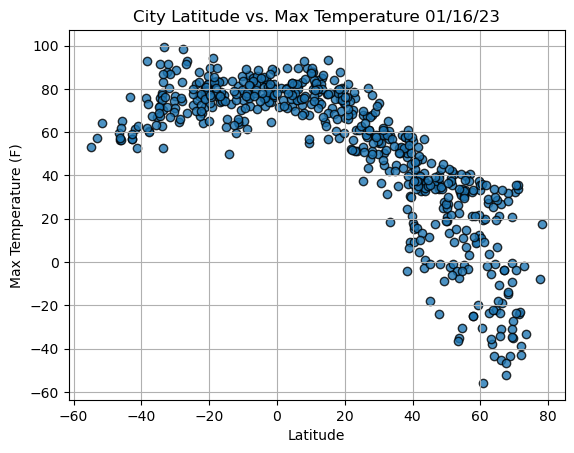

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

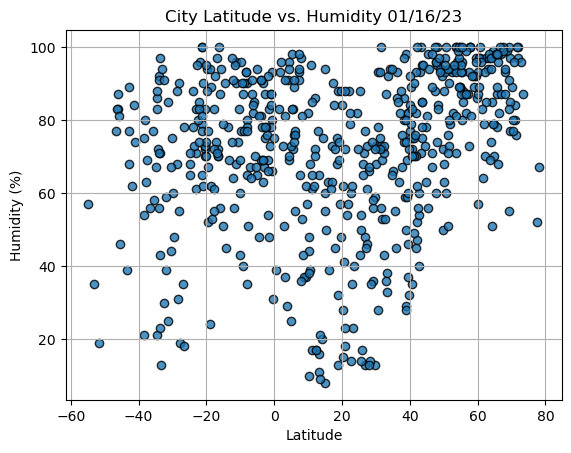

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

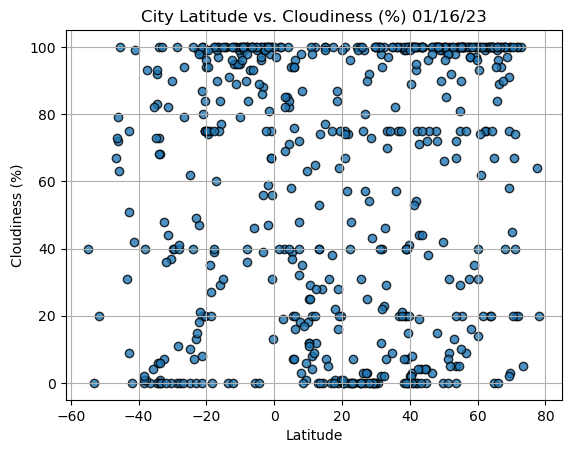

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

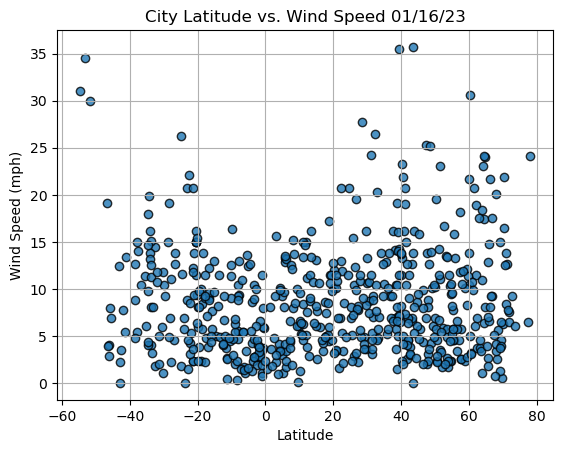

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()